# Tutorial: Modelset loading

This notebook demonstrates how to use load and validate modelset configuration for sampling.

In [ ]:
import yaml
from flumodelingsuite.config_loader import load_basemodel_config_from_file, load_sampling_config_from_file, load_calibration_config_from_file
# from flumodelingsuite.sampling_validator import validate_sampling
# from flumodelingsuite.calibration_validator import validate_calibration

# from flumodelingsuite.schema import validate_modelset_consistency
from flumodelingsuite.dispatcher.builder import dispatch_builder
from flumodelingsuite.dispatcher.runner import dispatch_runner
from flumodelingsuite.schema.calibration import reproduce_trajectory, reproduce_all_trajectories
from flumodelingsuite.builders.orchestrators import make_simulate_wrapper
import datetime as dt

import logging

# Basic configuration - logs to console
# logging.basicConfig(
#     level=logging.INFO,  # Show INFO and above (INFO, WARNING, ERROR, CRITICAL)
#     format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
# )
import matplotlib.pyplot as plt

***
## Calibration modelset

### Load and validate YAML

In [ ]:
calibration_config = load_calibration_config_from_file("data/flu_round05_modelset_calibration.yml")
# calibration_config = load_calibration_config_from_file("data/projection-2024-11.yml")

In [ ]:
calibration_config.modelset.calibration.fitting_window

FittingWindow(start_date=datetime.date(2024, 9, 15), end_date=datetime.date(2025, 4, 19))

In [ ]:
basemodel_config = load_basemodel_config_from_file("data/flu_round05_basemodel_calibration.yml")
# basemodel_config = load_basemodel_config_from_file("data/basemodel.yml")

In [ ]:
basemodel_config.model.random_seed

42

In [6]:
calibrators = dispatch_builder(
    basemodel_config=basemodel_config,
    sampling_config=None,
    calibration_config=calibration_config
)

In [7]:
cal_res = dispatch_runner(calibrators[0])

Starting ABC-SMC with 10 particles and 2 generations

Generation 1/2 (epsilon: inf)
(297,)
(299,)
(359,)
(321,)
(369,)
(375,)
(351,)
(379,)
(317,)
(307,)
	Accepted 10/10 (acceptance rate: 100.00%)
	Elapsed time: 00:00:06

Generation 2/2 (epsilon: 668.407545)
(331,)
(321,)
(287,)
(359,)
(297,)
(317,)
(321,)
(293,)
(317,)
(321,)
(307,)
(431,)
(351,)
(321,)
(379,)
(359,)
(317,)
(359,)
(305,)
(425,)
(321,)
(359,)
(369,)
(359,)
	Accepted 10/24 (acceptance rate: 41.67%)
	Elapsed time: 00:00:14
(371,)
(377,)
(371,)
(515,)
(371,)
(515,)
(371,)
(415,)
(371,)
(371,)


In [7]:
calibration_results = calibrators[0].calibrator.calibrate(
            strategy="smc", num_particles=10, num_generations=2
        )

Starting ABC-SMC with 10 particles and 2 generations

Generation 1/2 (epsilon: inf)
2024-10-11 2025-04-19 191
                  dates location      0-4      5-17     18-49     50-64  \
0   2024-10-11 00:00:00    US-MA  69996.0  155165.0  222529.0  141110.0   
1   2024-10-11 12:00:00    US-MA  69996.0  155165.0  222529.0  141110.0   
2   2024-10-12 00:00:00    US-MA  69995.0  155164.0  222529.0  141110.0   
3   2024-10-12 12:00:00    US-MA  69995.0  155164.0  222529.0  141110.0   
4   2024-10-13 00:00:00    US-MA   3354.0   10258.0   18541.0   12093.0   
..                  ...      ...      ...       ...       ...       ...   
461 2025-05-29 12:00:00    US-MA      0.0       0.0     568.0       0.0   
462 2025-05-30 00:00:00    US-MA      0.0       0.0     568.0       0.0   
463 2025-05-30 12:00:00    US-MA      0.0       0.0     568.0       0.0   
464 2025-05-31 00:00:00    US-MA      0.0       0.0     568.0       0.0   
465 2025-05-31 12:00:00    US-MA      0.0       0.0     568.0    

KeyboardInterrupt: 

In [8]:
cal_res.results.projections['baseline'][0]['S_to_S_vax_total']

array([      0.,       0.,       0., 1027228.,  267616.,  261970.,
        226680.,  189742.,  160668.,  138249.,  111212.,   85174.,
         66063.,   55050.,   46626.,   41328.,   36898.,   33316.,
         29769.,   25735.,   21906.,   19469.,   16884.,   14792.,
         13422.,   12863.,   11401.,    9256.,    6892.,    5717.,
          5383.,    4784.,    4189.,    3498.,    3411.,    3492.,
          3634.])

In [9]:
for i in cal_res.results.selected_trajectories[0]:
    print(i['random_state'])

{'bit_generator': 'PCG64', 'state': {'state': 82603460112531164776355945615041298124, 'inc': 25065611243303971628957076795638243391}, 'has_uint32': 0, 'uinteger': 0}
{'bit_generator': 'PCG64', 'state': {'state': 204618317628021592140626490790338193916, 'inc': 25065611243303971628957076795638243391}, 'has_uint32': 0, 'uinteger': 0}
{'bit_generator': 'PCG64', 'state': {'state': 6798425784692288331491950588186633700, 'inc': 25065611243303971628957076795638243391}, 'has_uint32': 0, 'uinteger': 0}
{'bit_generator': 'PCG64', 'state': {'state': 101064927110669808048764400245065392057, 'inc': 25065611243303971628957076795638243391}, 'has_uint32': 0, 'uinteger': 0}
{'bit_generator': 'PCG64', 'state': {'state': 162737546837608394418534253014656718903, 'inc': 25065611243303971628957076795638243391}, 'has_uint32': 0, 'uinteger': 0}
{'bit_generator': 'PCG64', 'state': {'state': 186017340866227092376152090751283589727, 'inc': 25065611243303971628957076795638243391}, 'has_uint32': 0, 'uinteger': 0}
{

In [11]:
for i in cal_res.results.projections['baseline']:
    print(i['S_to_S_vax_total'])

[      0.       0.       0.       0.       0.       0.       0.       0.
 1820683.  119417.   94822.   72891.   57022.   46589.   39721.   35226.
   31248.   28223.   24920.   21251.   18627.   16353.   14483.   12654.
   11577.   10727.    9723.    7606.    5870.    4715.    4469.    4053.
    3379.    2995.    2827.    2962.    3023.]
[     0.      0. 993107. 299833. 341131. 338335. 296170. 251605. 215514.
 187417. 150272. 116890.  90549.  75229.  63864.  56147.  50719.  45819.
  40277.  35063.  30604.  26660.  23282.  20628.  18665.  17402.  15906.
  12614.   9655.   7936.   7483.   6871.   5687.   4883.   4619.   4817.
   4831.]
[      0.       0.       0.       0.       0. 1713127.  259621.  217897.
  184381.  157398.  122818.   91033.   67710.   52282.   41816.   34604.
   29821.   26078.   22564.   19472.   16702.   14574.   12745.   11134.
   10028.    9340.    8462.    6825.    5150.    4454.    4279.    3825.
    3317.    2814.    2845.    2812.    2954.]
[      0.       0.  

In [12]:
generation = 1
particle_index = 6
reproduced = reproduce_trajectory(
    calibrator=calibrators[0].calibrator,
    calibration_results=cal_res.results,
    particle_index=particle_index,
    generation=generation,
)

In [13]:
reproduced_all = reproduce_all_trajectories(
    calibrator=calibrators[0].calibrator,
    calibration_results=cal_res.results,
) 

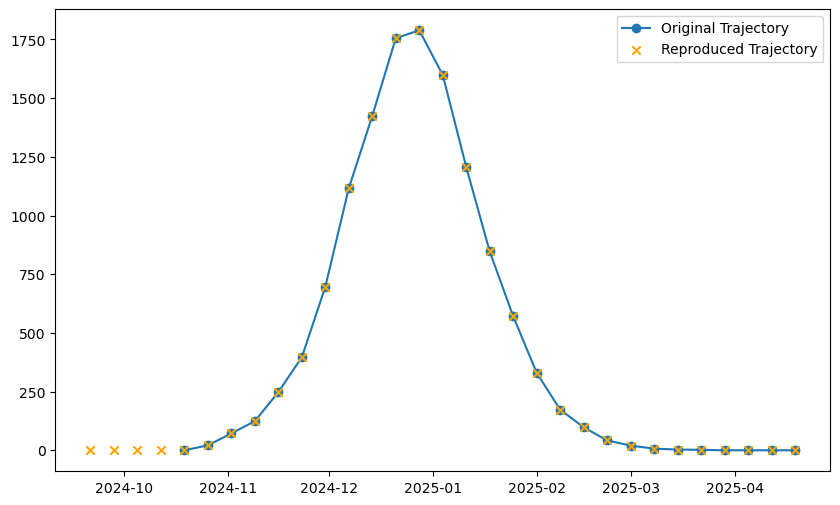

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
generation = 1
particle_index = 0
trajectory = cal_res.results.selected_trajectories[generation][particle_index]
ax.plot(trajectory['date'], trajectory['data'], marker='o', zorder=1, label = 'Original Trajectory')
# ax.scatter(reproduced['date'], reproduced['data'], marker='x', color='orange', zorder=2, label='Reproduced Trajectory')
hosp = reproduced_all[generation][particle_index]['Home_sev_to_Hosp_total'] + reproduced_all[generation][particle_index]["Home_sev_vax_to_Hosp_vax_total"]
ax.scatter(reproduced_all[generation][particle_index]['date'], hosp, marker='x', color='orange', zorder=2, label='Reproduced Trajectory')
ax.legend()

In [26]:
trajectory['date']

[Timestamp('2024-10-19 00:00:00'),
 Timestamp('2024-10-26 00:00:00'),
 Timestamp('2024-11-02 00:00:00'),
 Timestamp('2024-11-09 00:00:00'),
 Timestamp('2024-11-16 00:00:00'),
 Timestamp('2024-11-23 00:00:00'),
 Timestamp('2024-11-30 00:00:00'),
 Timestamp('2024-12-07 00:00:00'),
 Timestamp('2024-12-14 00:00:00'),
 Timestamp('2024-12-21 00:00:00'),
 Timestamp('2024-12-28 00:00:00'),
 Timestamp('2025-01-04 00:00:00'),
 Timestamp('2025-01-11 00:00:00'),
 Timestamp('2025-01-18 00:00:00'),
 Timestamp('2025-01-25 00:00:00'),
 Timestamp('2025-02-01 00:00:00'),
 Timestamp('2025-02-08 00:00:00'),
 Timestamp('2025-02-15 00:00:00'),
 Timestamp('2025-02-22 00:00:00'),
 Timestamp('2025-03-01 00:00:00'),
 Timestamp('2025-03-08 00:00:00'),
 Timestamp('2025-03-15 00:00:00'),
 Timestamp('2025-03-22 00:00:00'),
 Timestamp('2025-03-29 00:00:00'),
 Timestamp('2025-04-05 00:00:00'),
 Timestamp('2025-04-12 00:00:00'),
 Timestamp('2025-04-19 00:00:00'),
 Timestamp('2025-04-26 00:00:00'),
 Timestamp('2025-05-

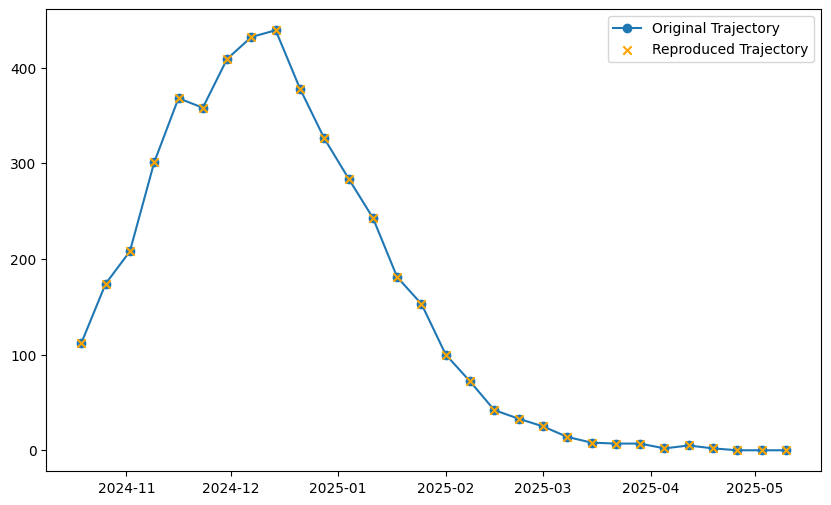

In [78]:
fig, ax = plt.subplots(figsize=(10, 6))
generation = 1
particle_index = 4
trajectory = cal_res.results.selected_trajectories[generation][particle_index]
reproduced = reproduced_all[generation][particle_index]
ax.plot(trajectory['date'], trajectory['data'], marker='o', zorder=1, label = 'Original Trajectory')
ax.scatter(reproduced['date'], reproduced['data'], marker='x', color='orange', zorder=2, label='Reproduced Trajectory')
# hosp = reproduced['Home_sev_to_Hosp_total'] + reproduced["Home_sev_vax_to_Hosp_vax_total"]
# ax.scatter(reproduced['date'], hosp, marker='x', color='orange', zorder=2, label='Reproduced Trajectory')
ax.legend()

In [14]:
import numpy as np
rng = np.random.default_rng(43)
state = rng.bit_generator.state
state

{'bit_generator': 'PCG64',
 'state': {'state': 82603460112531164776355945615041298124,
  'inc': 25065611243303971628957076795638243391},
 'has_uint32': 0,
 'uinteger': 0}

In [25]:
cal_res.results.projection_parameters

{'baseline':          Rt  seasonality_min         L  Initial_immune  start_date
 0  1.461583         0.750538  0.000750        0.254926        48.0
 1  1.195267         0.805061  0.000588        0.104545        51.0
 2  1.195267         0.805061  0.000588        0.104545        51.0
 3  1.081974         0.835426  0.000278        0.225977        41.0
 4  1.197037         0.755505  0.000169        0.214033        25.0
 5  1.195267         0.805061  0.000588        0.104545        51.0
 6  1.195267         0.805061  0.000588        0.104545        51.0
 7  1.166504         0.819939  0.000233        0.281118        49.0
 8  1.097547         0.693985  0.000387        0.166295        55.0
 9  1.647632         0.728771  0.000323        0.248689        56.0}

In [9]:
cal_res.results.projections['baseline'][0]

{'dates': [Timestamp('2024-09-21 00:00:00'),
  Timestamp('2024-09-28 00:00:00'),
  Timestamp('2024-10-05 00:00:00'),
  Timestamp('2024-10-12 00:00:00'),
  Timestamp('2024-10-19 00:00:00'),
  Timestamp('2024-10-26 00:00:00'),
  Timestamp('2024-11-02 00:00:00'),
  Timestamp('2024-11-09 00:00:00'),
  Timestamp('2024-11-16 00:00:00'),
  Timestamp('2024-11-23 00:00:00'),
  Timestamp('2024-11-30 00:00:00'),
  Timestamp('2024-12-07 00:00:00'),
  Timestamp('2024-12-14 00:00:00'),
  Timestamp('2024-12-21 00:00:00'),
  Timestamp('2024-12-28 00:00:00'),
  Timestamp('2025-01-04 00:00:00'),
  Timestamp('2025-01-11 00:00:00'),
  Timestamp('2025-01-18 00:00:00'),
  Timestamp('2025-01-25 00:00:00'),
  Timestamp('2025-02-01 00:00:00'),
  Timestamp('2025-02-08 00:00:00'),
  Timestamp('2025-02-15 00:00:00'),
  Timestamp('2025-02-22 00:00:00'),
  Timestamp('2025-03-01 00:00:00'),
  Timestamp('2025-03-08 00:00:00'),
  Timestamp('2025-03-15 00:00:00'),
  Timestamp('2025-03-22 00:00:00'),
  Timestamp('2025-0

In [23]:
import pandas as pd
flu_data = pd.read_csv("../tutorials/data/flu_hosp_24.csv")
flu_data['target_end_date'] = pd.to_datetime(flu_data['target_end_date'])
flu_data_ma = flu_data[flu_data['geo_value'] == 'US-NY']

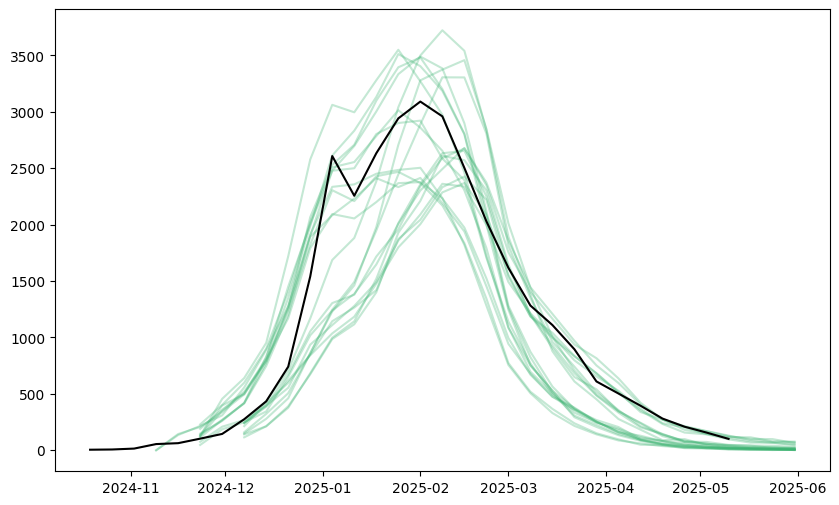

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))
for i in cal_res.results.projections['baseline']:
    # print(i)
    if i:
        ax.plot(i['dates'], i['transitions']['Home_sev_to_Hosp_total'] + i['transitions']['Home_sev_vax_to_Hosp_vax_total'], alpha=0.3, color = 'mediumseagreen')
ax.plot(flu_data_ma['target_end_date'], flu_data_ma['hospitalizations'], color='black', label='Observed Hospitalizations')

In [ ]:
from flumodelingsuite.config_loader import _add_vaccination_schedules_from_config

